# Dataset
Extracting the Dataset For the Model

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Dataset (2).zip to Dataset (2).zip


Since the file is zipped we will unzip it's contents.


In [ ]:
import os
import zipfile
# making the directory
os.makedirs('/content/MyDataset' ,exist_ok = True)

zip_path = 'Dataset (2).zip'

with zipfile.ZipFile(zip_path, 'r')as zip_ref:
   zip_ref.extractall('/content/MyDataset')

#Checking if the Dataset accessed.
print(os.listdir('/content/MyDataset'))

['Validation', 'Train', 'Test']


# Importing Libraries
We will get necessary libraies for building , training and testing of the Model

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Preprocessing the Dataset

In [ ]:
# Scaling the image
data_gen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip = True,
    vertical_flip = True,
    rotation_range = 20,
)
# Creating Data Generators for each dataset

train_gen = data_gen.flow_from_directory('/content/MyDataset/Train',
                                         target_size=(150,150),
                                         batch_size=16,
                                         class_mode='binary'
                                         )

validation_gen = data_gen.flow_from_directory('/content/MyDataset/Validation',
                                         target_size=(150,150),
                                         batch_size=16,
                                         class_mode='binary'
                                         )


test_gen = data_gen.flow_from_directory('/content/MyDataset/Test',
                                         target_size=(150,150),
                                         batch_size=16,
                                         class_mode='binary',
                                         shuffle='False'
                                         )



Found 15000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


# Building CNN Model

In [ ]:
GenderClass = Sequential()

GenderClass.add(Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
GenderClass.add(BatchNormalization())
GenderClass.add(MaxPooling2D(2,2))

GenderClass.add(Conv2D(64, (3,3), activation='relu', input_shape=(150,150,3)))
GenderClass.add(BatchNormalization())
GenderClass.add(MaxPooling2D(2,2))

GenderClass.add(Conv2D(128, (3,3), activation='relu', input_shape=(150,150,3)))
GenderClass.add(BatchNormalization())
GenderClass.add(MaxPooling2D(2,2))

GenderClass.add(Flatten())

GenderClass.add(Dense(128, activation='relu'))
GenderClass.add(Dropout(0.1))
GenderClass.add(Dense(64, activation='relu'))
GenderClass.add(Dropout(0.1))
GenderClass.add(Dense(1, activation='sigmoid'))



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
GenderClass.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 148, 148, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 72, 72, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 34, 34, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,837,569 (18.45 MB)

 Trainable params: 4,837,121 (18.45 MB)

 Non-trainable params: 448 (1.75 KB)

Compiling The Model

In [ ]:
GenderClass.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training of the Model

In [ ]:
history = GenderClass.fit(train_gen,
                          validation_data=validation_gen,
                          epochs = 20
                          )

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


938/938 ━━━━━━━━━━━━━━━━━━━━ 114s 111ms/step - accuracy: 0.6288 - loss: 1.3948 - val_accuracy: 0.5505 - val_loss: 0.6334
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 109s 116ms/step - accuracy: 0.8208 - loss: 0.4230 - val_accuracy: 0.8460 - val_loss: 0.3497
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 133s 106ms/step - accuracy: 0.8866 - loss: 0.2909 - val_accuracy: 0.8900 - val_loss: 0.2722
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 108s 115ms/step - accuracy: 0.8976 - loss: 0.2637 - val_accuracy: 0.8835 - val_loss: 0.3013
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 99s 104ms/step - accuracy: 0.9092 - loss: 0.2309 - val_accuracy: 0.8845 - val_loss: 0.3047
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 99s 105ms/step - accuracy: 0.9265 - loss: 0.2035 - val_accuracy: 0.8920 - val_loss: 0.2890
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 99s 105ms/step - accuracy: 0.9286 - loss: 0.1895 - val_accuracy: 0.9325 - val_loss: 0.1977
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 141s 104ms/step - accuracy: 0.9316 - loss: 0.1905 

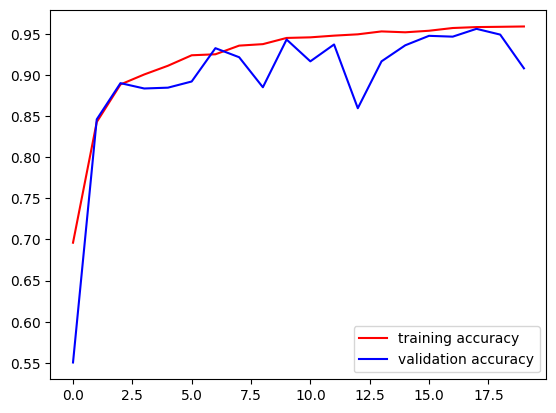

In [ ]:
# y axis = accuracy
# x axis = epochs


plt.plot(history.history['accuracy'],color='red',label='training accuracy')
plt.plot(history.history['val_accuracy'],color='blue',label='validation accuracy')
plt.legend()
plt.show()


# Testing The Model on Testing Dataset

In [ ]:
test_loss, test_acc = GenderClass.evaluate(test_gen)
print('Accuracy of the Model GenderClass on Test dataset:', {test_acc*100})

  2/125 ━━━━━━━━━━━━━━━━━━━━ 9s 76ms/step - accuracy: 0.9531 - loss: 0.1194  

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


125/125 ━━━━━━━━━━━━━━━━━━━━ 11s 89ms/step - accuracy: 0.9270 - loss: 0.2036
Accuracy of the Model GenderClass on Test dataset: {92.00000166893005}


# Saving The Model


In [ ]:
GenderClass.save('GenderClass.h5')

# Loading the Saved Model

In [ ]:
from tensorflow.keras.models import load_model
GenderClass = load_model('GenderClass.h5')

# Using the Model on Input DataSet by Me

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

# Load the pre-trained Haar Cascade for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Preprocess image with OpenCV and detect faces
def preprocess_and_detect_face(image_path):
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

    # Convert to grayscale for face detection
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Detect faces
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)  # Detect faces with scaleFactor and minNeighbors

    return img_rgb, faces

# List all image files in the Input Dataset folder
image_files = [os.path.join('/content/drive/MyDrive/imgDataset', file) for file in os.listdir('/content/drive/MyDrive/imgDataset') if file.endswith(('png', 'jpg', 'jpeg'))]

# Perform predictions and visualize results
plt.figure(figsize=(12, 12))
for i, (image_file, gender) in enumerate(results[:9]):  # Show first 9 images
    plt.subplot(3, 3, i + 1)

    # Get image and faces
    img_rgb, faces = preprocess_and_detect_face(os.path.join('/content/drive/MyDrive/imgDataset', image_file))

for (x, y, w, h) in faces:
        # Draw a square around the face
        img_rgb = cv2.rectangle(img_rgb, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Green color for the square

        # Place the predicted gender label above the face
        font = cv2.FONT_HERSHEY_SIMPLEX
        label_position = (x, y - 10)  # Position for the label (just above the face)
        img_rgb = cv2.putText(img_rgb, gender, label_position, font, 1, (255, 255, 255), 2, cv2.LINE_AA)  # White color for the label

    # Display the image with bounding box and gender label
    plt.imshow(img_rgb)
    plt.title(f"Predicted: {gender}")
    plt.axis('off')

plt.tight_layout()
plt.show()